In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 


In [171]:

train=pd.read_csv('application_train.csv',index_col=0)

In [172]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
train.describe()
train.info()
train.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
FLAG_OWN_REALTY               307511
CNT_CHILDREN                  307511
AMT_INCOME_TOTAL              307511
AMT_CREDIT                    307511
AMT_ANNUITY                   307499
AMT_GOODS_PRICE               307233
NAME_TYPE_SUITE               306219
NAME_INCOME_TYPE              307511
NAME_EDUCATION_TYPE           307511
NAME_FAMILY_STATUS            307511
NAME_HOUSING_TYPE             307511
REGION_POPULATION_RELATIVE    307511
DAYS_BIRTH                    307511
DAYS_EMPLOYED                 307511
DAYS_REGISTRATION             307511
DAYS_ID_PUBLISH               307511
OWN_CAR_AGE                   104582
FLAG_MOBIL                    307511
FLAG_EMP_PHONE                307511
FLAG_WORK_PHONE               307511
FLAG_CONT_MOBILE              307511
FLAG_PHONE                    307511
FLAG_EMAIL                    307511
O

0    282686
1     24825
Name: TARGET, dtype: int64


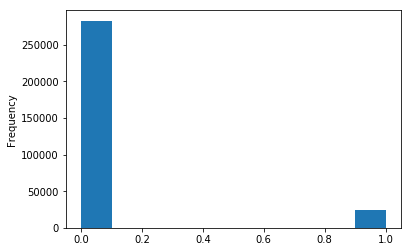

In [174]:
print(train['TARGET'].value_counts())
train['TARGET'].astype(int).plot.hist()

In [175]:
bad_ratio_train=100*train['TARGET'].sum()/len(train)
print(bad_ratio_train)

8.072881945686495


In [176]:
list(train['NAME_CONTRACT_TYPE'].unique())



['Cash loans', 'Revolving loans']

In [177]:
filter=train.NAME_CONTRACT_TYPE=='Revolving loans'


In [ ]:
train=train[filter]

In [179]:

train.count()



TARGET                        29279
NAME_CONTRACT_TYPE            29279
CODE_GENDER                   29279
FLAG_OWN_CAR                  29279
FLAG_OWN_REALTY               29279
CNT_CHILDREN                  29279
AMT_INCOME_TOTAL              29279
AMT_CREDIT                    29279
AMT_ANNUITY                   29279
AMT_GOODS_PRICE               29001
NAME_TYPE_SUITE               28994
NAME_INCOME_TYPE              29279
NAME_EDUCATION_TYPE           29279
NAME_FAMILY_STATUS            29279
NAME_HOUSING_TYPE             29279
REGION_POPULATION_RELATIVE    29279
DAYS_BIRTH                    29279
DAYS_EMPLOYED                 29279
DAYS_REGISTRATION             29279
DAYS_ID_PUBLISH               29279
OWN_CAR_AGE                   10130
FLAG_MOBIL                    29279
FLAG_EMP_PHONE                29279
FLAG_WORK_PHONE               29279
FLAG_CONT_MOBILE              29279
FLAG_PHONE                    29279
FLAG_EMAIL                    29279
OCCUPATION_TYPE             

In [180]:
new_bad_ratio_train=100*train['TARGET'].sum()/len(train)
print(new_bad_ratio_train)

5.478329177909082


In [181]:
train["AGE"]=[ each/-365 for each in train.DAYS_BIRTH]
train["AGE"].describe()

count    29279.000000
mean        40.753905
std         12.013878
min         21.030137
25%         30.871233
50%         39.953425
75%         50.323288
max         69.120548
Name: AGE, dtype: float64

In [182]:
train.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [184]:
train.drop(["NAME_CONTRACT_TYPE"],axis=1,inplace=True)

In [185]:
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243
train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (train["DAYS_EMPLOYED_ANOM"].sum(), len(train)))

There are 3366 anomalies in the test data out of 29279 entries


In [19]:
train["DAYS_EMPLOYED"]=[each*-1 if each<0 else each for each in train.DAYS_EMPLOYED]



In [188]:
train["JOB_YEAR"]=[(each*-1)/365 if each<0 else  each/365 for each in train.DAYS_EMPLOYED]



In [189]:
train["JOB_YEAR"].describe()

count    25913.000000
mean         5.843183
std          6.048593
min          0.008219
25%          1.819178
50%          3.824658
75%          7.723288
max         44.482192
Name: JOB_YEAR, dtype: float64

In [29]:

for col in train:
    if train.columns.dtype=='object':
         print(col)   

In [191]:
list(train['CODE_GENDER'].unique())

['M', 'F', 'XNA']

In [192]:
train["CODE_GENDER"]=['F' if each=='XNA' else each for each in train.CODE_GENDER]

In [193]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
train['CODE_GENDER']= le_sex.transform(train['CODE_GENDER']) 


In [194]:
list(train['FLAG_OWN_CAR'].unique())


['Y', 'N']

In [195]:
from sklearn import preprocessing
le_car = preprocessing.LabelEncoder()
le_car.fit(['N','Y'])
train['FLAG_OWN_CAR']= le_car.transform(train['FLAG_OWN_CAR']) 


In [196]:
list(train['NAME_INCOME_TYPE'].unique())


['Working',
 'State servant',
 'Commercial associate',
 'Pensioner',
 'Unemployed',
 'Businessman',
 'Maternity leave',
 'Student']

In [197]:
from sklearn import preprocessing
le_Income= preprocessing.LabelEncoder()
le_Income.fit(
['Working',
 'State servant',
 'Commercial associate',
 'Pensioner',
 'Unemployed',
 'Student',
 'Businessman',
 'Maternity leave'])
train['NAME_INCOME_TYPE']= le_Income.transform(train['NAME_INCOME_TYPE'])

In [198]:
list(train['NAME_EDUCATION_TYPE'].unique())

['Secondary / secondary special',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Academic degree']

In [199]:
le_education= preprocessing.LabelEncoder()
le_education.fit(
['Secondary / secondary special',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Academic degree'])
train['NAME_EDUCATION_TYPE']= le_education.transform(train['NAME_EDUCATION_TYPE'])

In [205]:
list(train['NAME_FAMILY_STATUS'].unique())

[3, 1, 5, 0, 2, 4]

In [204]:
le_family= preprocessing.LabelEncoder()
le_family.fit(
['Single / not married',
 'Married',
 'Civil marriage',
 'Widow',
 'Separated',
 'Unknown'])
train['NAME_FAMILY_STATUS']= le_family.transform(train['NAME_FAMILY_STATUS'])

In [206]:
list(train['NAME_HOUSING_TYPE'].unique())


['House / apartment',
 'With parents',
 'Municipal apartment',
 'Rented apartment',
 'Co-op apartment',
 'Office apartment']

In [207]:
le_housing= preprocessing.LabelEncoder()
le_housing.fit(
['House / apartment',
 'Rented apartment',
 'With parents',
 'Municipal apartment',
 'Office apartment',
 'Co-op apartment'])
train['NAME_HOUSING_TYPE']= le_housing.transform(train['NAME_HOUSING_TYPE'])

In [208]:

train.drop(["WEEKDAY_APPR_PROCESS_START"],axis=1,inplace=True)


In [211]:
list(train['ORGANIZATION_TYPE'].unique())

[11,
 9,
 7,
 13,
 42,
 5,
 39,
 40,
 28,
 51,
 54,
 30,
 55,
 3,
 20,
 12,
 57,
 4,
 27,
 33,
 46,
 2,
 31,
 14,
 53,
 10,
 47,
 41,
 49,
 17,
 26,
 16,
 48,
 24,
 34,
 38,
 19,
 1,
 21,
 56,
 43,
 35,
 15,
 44,
 29,
 8,
 0,
 50,
 22,
 6,
 45,
 32,
 36,
 25,
 18,
 37,
 52,
 23]

In [210]:
le_org= preprocessing.LabelEncoder()
le_org.fit(
['Business Entity Type 3',
 'School',
 'Government',
 'Religion',
 'Other',
 'XNA',
 'Electricity',
 'Medicine',
 'Business Entity Type 2',
 'Self-employed',
 'Transport: type 2',
 'Construction',
 'Housing',
 'Kindergarten',
 'Trade: type 7',
 'Industry: type 11',
 'Military',
 'Services',
 'Security Ministries',
 'Transport: type 4',
 'Industry: type 1',
 'Emergency',
 'Security',
 'Trade: type 2',
 'University',
 'Transport: type 3',
 'Police',
 'Business Entity Type 1',
 'Postal',
 'Industry: type 4',
 'Agriculture',
 'Restaurant',
 'Culture',
 'Hotel',
 'Industry: type 7',
 'Trade: type 3',
 'Industry: type 3',
 'Bank',
 'Industry: type 9',
 'Insurance',
 'Trade: type 6',
 'Industry: type 2',
 'Transport: type 1',
 'Industry: type 12',
 'Mobile',
 'Trade: type 1',
 'Industry: type 5',
 'Industry: type 10',
 'Legal Services',
 'Advertising',
 'Trade: type 5',
 'Cleaning',
 'Industry: type 13',
 'Trade: type 4',
 'Telecom',
 'Industry: type 8',
 'Realtor',
 'Industry: type 6'])
train['ORGANIZATION_TYPE']= le_org.transform(train['ORGANIZATION_TYPE'])

In [212]:
list(train['FLAG_OWN_REALTY'].unique())

['Y', 'N']

In [213]:

le_ownrea= preprocessing.LabelEncoder()
le_ownrea.fit(
['Y', 'N'])
train['FLAG_OWN_REALTY']= le_ownrea.transform(train['FLAG_OWN_REALTY'])


In [225]:
list(train['NAME_TYPE_SUITE'].unique())

[7, 3, 1, 5, 0, 4, 6, 2]

In [217]:


train["NAME_TYPE_SUITE"].fillna("UNKNOW", inplace = True) 

In [224]:
le_nametype= preprocessing.LabelEncoder()
le_nametype.fit(
['Unaccompanied',
 'Other_A',
 'Family',
 'Spouse, partner',
 'Children',
 'Other_B',
 'UNKNOW',
 'Group of people'])
train['NAME_TYPE_SUITE']= le_nametype.transform(train['NAME_TYPE_SUITE'])

In [230]:

list(train['FONDKAPREMONT_MODE'].unique())


[0, 3, 2, 4, 1]

In [229]:
train["FONDKAPREMONT_MODE"].fillna("UNKNOW", inplace = True) 

In [228]:

le_fond= preprocessing.LabelEncoder()
le_fond.fit(
['UNKNOW',
 'reg oper account',
 'org spec account',
 'reg oper spec account',
 'not specified'])
train['FONDKAPREMONT_MODE']= le_fond.transform(train['FONDKAPREMONT_MODE'])

In [115]:
train.drop(["NAME_TYPE_SUITE"],axis=1,inplace=True)

In [231]:

list(train['WALLSMATERIAL_MODE'].unique())

[nan,
 'Stone, brick',
 'Panel',
 'Block',
 'Monolithic',
 'Mixed',
 'Others',
 'Wooden']

In [232]:
train["WALLSMATERIAL_MODE"].fillna("UNKNOW", inplace = True) 

In [233]:
le_wall= preprocessing.LabelEncoder()
le_wall.fit(
['Stone, brick',
 'Block',
 'UNKNOW',
 'Panel',
 'Mixed',
 'Wooden',
 'Others',
 'Monolithic'])
train['WALLSMATERIAL_MODE']= le_wall.transform(train['WALLSMATERIAL_MODE'])



In [234]:
list(train['EMERGENCYSTATE_MODE'].unique())

[nan, 'No', 'Yes']

In [235]:
train["EMERGENCYSTATE_MODE"].fillna("UNKNOW", inplace = True) 

In [236]:
le_emerg= preprocessing.LabelEncoder()
le_emerg.fit(
['No', 'UNKNOW', 'Yes'])
train['EMERGENCYSTATE_MODE']= le_emerg.transform(train['EMERGENCYSTATE_MODE'])



In [237]:

list(train['HOUSETYPE_MODE'].unique())

[nan, 'block of flats', 'specific housing', 'terraced house']

In [239]:
train["HOUSETYPE_MODE"].fillna("UNKNOW", inplace = True) 

In [240]:
le_house= preprocessing.LabelEncoder()
le_house.fit(
['block of flats','UNKNOW',  'terraced house', 'specific housing'])
train['HOUSETYPE_MODE']= le_house.transform(train['HOUSETYPE_MODE'])

In [241]:
list(train['OCCUPATION_TYPE'].unique())

['Laborers',
 'Managers',
 'Sales staff',
 'Core staff',
 'Security staff',
 nan,
 'Drivers',
 'Medicine staff',
 'Secretaries',
 'High skill tech staff',
 'Cooking staff',
 'Accountants',
 'Low-skill Laborers',
 'HR staff',
 'IT staff',
 'Realty agents',
 'Waiters/barmen staff',
 'Cleaning staff',
 'Private service staff']

In [242]:
train["OCCUPATION_TYPE"].fillna("UNKNOW", inplace = True) 

In [243]:
le_occupation= preprocessing.LabelEncoder()
le_occupation.fit(
['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 'UNKNOW',
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff'])
train['OCCUPATION_TYPE']= le_occupation.transform(train['OCCUPATION_TYPE'])

In [245]:
Y=train["TARGET"].values

In [246]:
X=train

In [247]:
x=x.fillna(0)

In [248]:

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Z-skor 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [249]:

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [250]:
logisticRegr=LogisticRegression()

logisticRegr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [257]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = logisticRegr.predict_proba(x_test)[:, 0]
print(log_reg_pred)

[0.9014419  0.96708067 0.91489302 ... 0.94371257 0.81950541 0.90860678]


In [272]:


print("Training:"+str(logisticRegr.score(x_train,y_train)))
print("Test:"+str(logisticRegr.score(x_test,y_test)))
y_pred= logisticRegr.predict(x_test)

Training:0.919189619849761
Test:0.9195161211648212


NameError: name 'logisticReg' is not defined